# RAW to RGB

To convert a RAW image from bayer patern to RGB, opencv can be used.

First is to convert th RAW data in a more readable form. 

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Import cv2 (opencv) to read the image and convert it in RGB
import cv2

# The os module is used to execure dcraw
import os

import matplotlib.pyplot as plt
import numpy as np

In [3]:
sourcepath = "./Test_Images"
sourcefile = "Non_Defiltered"

The command dcraw can convert some RAW file to differente file format. To extract the raw data the following command can be used:

dcraw -d -4 rawfile.CR2

A rawfile.pgm will be generated. The -d option indicate a raw export (without debayerization). The -4 option produce a 16 bit image without white balance and with a gamma of 1. 

In [12]:
os.system('dcraw -d -4 ' + sourcepath +'/' + sourcefile + '.CR2')

0

Read the result file. dcraw write in a 16 bit PGM file

In [5]:
image = cv2.imread("./Test_Images/Non_Defiltered.pgm", cv2.IMREAD_UNCHANGED)

The IMREAD_UNCHANGED keep the values as they are and not normalize them.

In [6]:
image

array([[20048, 23554, 20450, ...,  5209,  6164,  5161],
       [23517, 31516, 23420, ...,  4973,  5348,  4755],
       [18426, 24406, 20905, ...,  5289,  5414,  5177],
       ..., 
       [ 9112, 10220,  9876, ..., 11763, 11632, 11544],
       [ 9545, 10848,  9925, ..., 12201, 11147, 12013],
       [ 9648,  9202,  9179, ..., 10611, 11377, 10568]], dtype=uint16)

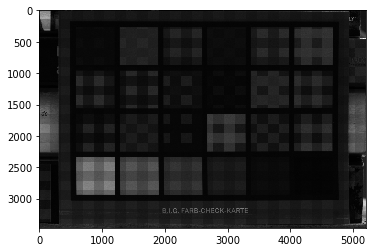

In [7]:
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [8]:
RGB_image = cv2.cvtColor(image, cv2.COLOR_BayerBG2RGB)

In [9]:
RGB_image

array([[[19957, 23724, 31516],
        [19957, 23724, 31516],
        [20678, 23420, 31783],
        ..., 
        [ 5916,  5351,  4973],
        [ 5789,  5348,  4864],
        [ 5789,  5348,  4864]],

       [[19957, 23724, 31516],
        [19957, 23724, 31516],
        [20678, 23420, 31783],
        ..., 
        [ 5916,  5351,  4973],
        [ 5789,  5348,  4864],
        [ 5789,  5348,  4864]],

       [[19666, 24406, 32133],
        [19666, 24406, 32133],
        [20905, 23624, 32210],
        ..., 
        [ 5709,  5289,  4924],
        [ 5414,  5226,  4898],
        [ 5414,  5226,  4898]],

       ..., 
       [[ 9494, 10220, 10871],
        [ 9494, 10220, 10871],
        [ 9876,  9708, 10792],
        ..., 
        [11639, 11763, 12212],
        [11632, 11315, 12195],
        [11632, 11315, 12195]],

       [[ 9454,  9723, 10848],
        [ 9454,  9723, 10848],
        [ 9528,  9925, 10600],
        ..., 
        [11143, 11177, 12201],
        [11505, 11147, 12107],
        [1

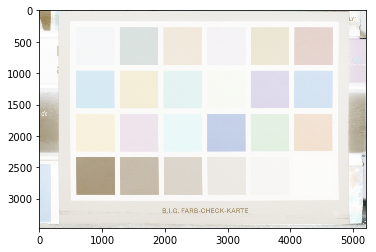

In [10]:
RGB_image8bit = np.round((RGB_image / 256))
plt.imshow(RGB_image8bit, interpolation='none')

In [11]:
cv2.imwrite("test2.tif", RGB_image)

True